In [ ]:
Mall clustering Assignment
Artificial Intelligence — Practical Exercise 6 
1.Christine Mungla-150367
2.Nyaga Gacheru-167284
3.Dudi Daniela -165828
4.Caleb Kariuki 152318
5.Emma Karanja 150739
6.Austine Namayi 168237

In [2]:
!pip install kagglehub


In [3]:
import kagglehub

path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)


100%|██████████| 1.55k/1.55k [00:00<00:00, 590kB/s]

Extracting files...
Path to dataset files: C:\Users\austi\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1


In [4]:
import pandas as pd
import os

csv_path = os.path.join(path, "Mall_Customers.csv")
df = pd.read_csv(csv_path)

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Check data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Summary statistics of numerical columns
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


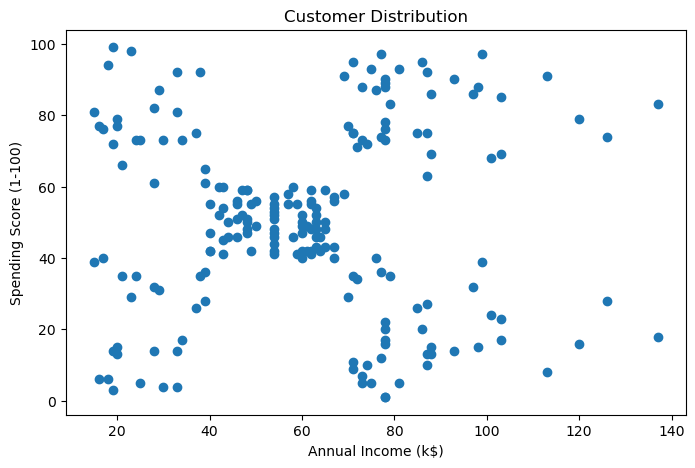

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()


C:\Users\austi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\austi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\austi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\austi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

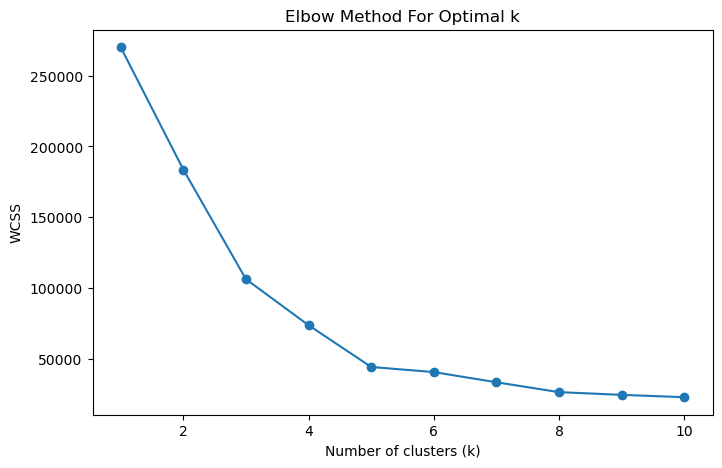

In [9]:
from sklearn.cluster import KMeans

wcss = []  # within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()


In [10]:
from sklearn.cluster import KMeans

# Train KMeans using K = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)

# Add the cluster labels back into the dataframe
df['Cluster'] = labels
df.head()


C:\Users\austi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


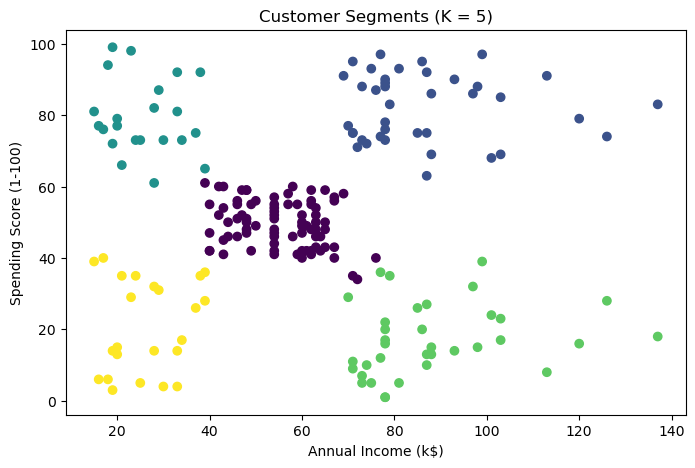

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], 
            c=labels, marker='o')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (K = 5)")
plt.show()


In [12]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, labels)
print("Silhouette Score :", sil_score)


Silhouette Score : 0.553931997444648


In [13]:
X1 = df[['Annual Income (k$)']]


C:\Users\austi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\austi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\austi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\austi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

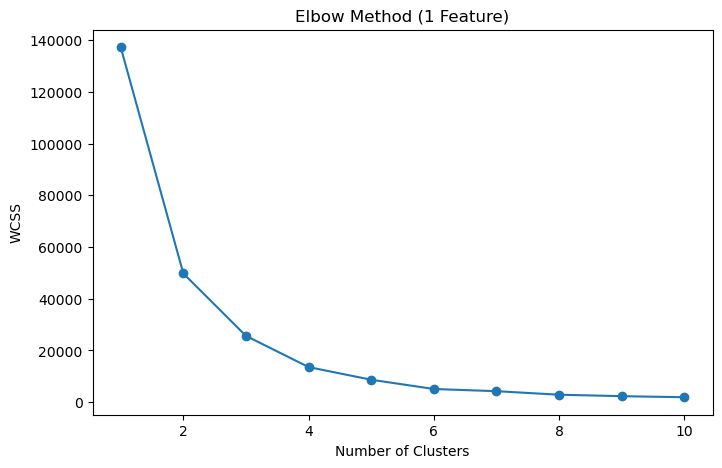

In [14]:
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    wcss1.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss1, marker='o')
plt.title("Elbow Method (1 Feature)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [ ]:
sil_score1 = silhouette_score(X1, labels1)
print("Silhouette Score (1 feature):", sil_score1)


In [15]:
kmeans1 = KMeans(n_clusters=3, random_state=42)
labels1 = kmeans1.fit_predict(X1)
df['Cluster_1F'] = labels1
df.head()


C:\Users\austi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_1F
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,4,2
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,4,2


In [16]:
sil_score1 = silhouette_score(X1, labels1)
print("Silhouette Score (1 feature):", sil_score1)


Silhouette Score (1 feature): 0.5188101430914764


In [ ]:
Clustering with one feature (Annual Income) resulted in less distinct groups. Although customers could be grouped by their income brackets, it did not capture their spending patterns.

Clustering with two features (Annual Income and Spending Score) produced clearer and more meaningful customer segments. The clusters were well separated visually and also had a higher silhouette score, indicating better clustering performance.

Therefore, using two features provides a more accurate representation of customer behavior

In [ ]:
Based on the 5-cluster model, the mall can tailor engagement strategies for different customer groups.

High Income / High Spenders: Reward them with exclusive offers, personalized shopping experiences, and loyalty programs to retain them.

High Income / Low Spenders: Encourage them to spend more through premium promotions, bundled deals, and VIP events.

Low Income / High Spenders: Provide discounts and loyalty points to sustain their purchasing behavior.

Low Income / Low Spenders: Run awareness campaigns and budget-friendly product offers to increase footfall.

Average Customers: Use seasonal promotions and targeted marketing to increase spending.

These customer engagement strategies allow the mall to allocate resources effectively and increase overall revenue.

In [ ]:
Mall Customer Segmentation using K-Means

In this practical exercise, we applied K-Means clustering to segment customers in a mall based on their characteristics. Below is a summary of what was done and how each question was answered:

Q1: Download and Upload Dataset 

We downloaded the Mall Customer Segmentation dataset from Kaggle and loaded it into Jupyter Notebook for analysis.

Q2: Data Cleaning & EDA 

We:

Checked for missing values

Viewed dataset structure and statistics

Plotted distributions (Income & Spending Score)

Explored gender proportions

 Insights from EDA:

Most customers fall into middle-income brackets.

Spending behavior varies greatly even within similar income ranges.

The gender distribution in the mall is balanced, meaning both groups shop almost equally.

Q3: K-Means Clustering 

We applied K-Means in two cases:

(a) Using 1 feature: Annual Income

Used Elbow Method → Optimal clusters: K = 3

Performed K-Means and added cluster labels to the dataset

Evaluated using Silhouette Score

(b) Using 2 features: Annual Income & Spending Score

Used Elbow Method → Optimal clusters: K = 5

Applied K-Means and visualized results in a 2D scatter plot

Silhouette score confirmed better clustering separation

 Result:
2-feature clustering produced clearer and more meaningful segment groups 

Q4: Compare Clustering Results 
1 Feature	2 Features
Based only on income	Based on income + spending behavior
Clusters overlap	Clusters clearly separated
Less understanding of customer behavior	Better understanding of shopping habits

 Conclusion:
Using two features gives better segmentation and much more useful customer insights.

Q5: Business Recommendations

We suggested how mall management can interact with each segment:

Segment Type	Recommendation
High income, high spending	VIP treatment, exclusive rewards
High income, low spending	Incentives to increase spending
Low income, high spending	Discounts and loyalty bonuses
Low income, low spending	Budget-friendly promotions
Middle groups	Targeted seasonal campaigns